In [1]:
import pandas as pd 
import matplotlib.pylab as plt
from scipy.spatial.distance import cdist 
import re
import gensim
#from gensim import models,corpora,similarities
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora
stmr = PorterStemmer()
lemme = WordNetLemmatizer()
# for visualizing the topic modelling 
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
# coherence score
from gensim.models import CoherenceModel


E:\Bokey\Window_SW\Conda_INS\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# Loading stopwords from external file
stop_words = []
with open("D:\\My_Works\\Bharani Assignment\\Text Processing\\sw.txt","r") as sw:
    stop_words = sw.read()
stop_words = stop_words.split("\n")  
stop_words.append("the")
stop_words.extend(["for","then","they","but"])

# Data set to be clustered
#data1 = pd.read_csv("D:\\My_Works\\Bharani Assignment\\New_Textmining\\Dataset-1.csv")
with open("D:\\My_Works\\Bharani Assignment\\New_Textmining\\Dataset-2.txt","r",encoding="utf-8") as b:
    data_2 = b.read().split("\n")
data_2 = data_2[1:]
data_2 = [i.split(":")[1] for i in data_2]
data1 = pd.DataFrame(columns=["Text"])
data1["Text"] = data_2
data1.head(10)


,Text
0,"""AIM Pudendal nerve stimulation (PNS), which ..."
1,"""HIV-1 can be subdivided into distinct subtyp..."
2,"""Alterations of the central serotonergic syst..."
3,"""Solving software evaluation problems is a pa..."
4,"""In this paper we address the control of a gr..."
5,"""The popularity of wearables is exponentially..."
6,"""Development of behavioral pattern recognitio..."
7,"""Mutation studies previously showed that the ..."
8,"""The forces driving extra-pair reproduction b..."
9,"""Multiple signaling pathways are employed by ..."


In [3]:
# Cleaning function 
def clean_text(i):
    txt = re.sub("[^A-Za-z ]","",i).lower()
    #words = [stmr.stem(lemme.lemmatize(i)) for i in txt.split(" ") if len(i)>2] # if not i in stop_words]
    words = [lemme.lemmatize(i) for i in txt.split(" ") if len(i)>2] # if not i in stop_words]
    words = [k for k in words if not i in stop_words]
    return words

In [4]:
data_words = [clean_text(i) for i in data1.Text]
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# to make execution faster we use Phraser from gensim models phrases
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

bigram_words = [bigram_mod[i] for i in data_words]

# Preparing a word dictionary 
ID_2_WORD = corpora.Dictionary(bigram_words)


E:\Bokey\Window_SW\Conda_INS\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [5]:
# Term Document Frequency 
TDM = [ID_2_WORD.doc2bow(i) for i in bigram_words]

# Top modelling 
LDA_MOD = gensim.models.ldamodel.LdaModel(corpus=TDM,id2word = ID_2_WORD,
                                          num_topics=10,
                                          random_state=100,
                                          update_every=1,
                                          chunksize=100,
                                          passes = 10,
                                          alpha = "auto",
                                          per_word_topics=True
                                          )


In [6]:

# calculating the coherrence score to measure the how good is the topic modelling is 
coherence_LDA_MOD = CoherenceModel(model=LDA_MOD, texts=bigram_words, dictionary=ID_2_WORD, coherence='c_v')
coherence_LDA = coherence_LDA_MOD.get_coherence()

print (coherence_LDA) # 0.4191560

0.433923667313


In [8]:
# Topic modelling visualization - topics - 10
pyLDAvis.enable_notebook()
visulize = pyLDAvis.gensim.prepare(LDA_MOD,TDM,ID_2_WORD)
visulize


E:\Bokey\Window_SW\Conda_INS\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
5      31.573618        1       1  0.242653 -0.087528
0      16.466053        1       2  0.229090  0.102522
8      13.891794        1       3  0.232005  0.072729
6      10.340394        1       4  0.036576 -0.177232
7       6.536064        1       5  0.110095  0.048653
1       5.542850        1       6 -0.063398 -0.174530
9       4.659813        1       7 -0.188509 -0.251847
2       4.648411        1       8 -0.077908  0.242732
4       4.160308        1       9 -0.245913  0.140502
3       2.180697        1      10 -0.274692  0.083998, topic_info=       Category           Freq           Term          Total  loglift  logprob
term                                                                          
86      Default  293062.000000            the  293062.000000  30.0000  30.0000
5       Default  159053.000000            and  159053.000000  29.0000  29.0000
93      Default   24626.000000             wa   24626.000000  28.0000  28.0000
94      Default   21986.000000           were   21986.000000  27.0000  27.0000
59      Default   12759.000000        patient   12759.000000  26.0000  26.0000
108     Default    9440.000000           cell    9440.000000  25.0000  25.0000
299     Default   44665.000000           that   44665.000000  24.0000  24.0000
97      Default   46220.000000           with   46220.000000  23.0000  23.0000
88      Default   35385.000000           this   35385.000000  22.0000  22.0000
82      Default   15764.000000          study   15764.000000  21.0000  21.0000
488     Default    7940.000000         effect    7940.000000  20.0000  20.0000
243     Default   12780.000000         system   12780.000000  19.0000  19.0000
597     Default    8907.000000          their    8907.000000  18.0000  18.0000
31      Default   53618.000000            for   53618.000000  17.0000  17.0000
1299    Default    4326.000000           gene    4326.000000  16.0000  16.0000
103     Default   28532.000000            are   28532.000000  15.0000  15.0000
44      Default   10796.000000         method   10796.000000  14.0000  14.0000
864     Default    5300.000000       research    5300.000000  13.0000  13.0000
522     Default    4092.000000        protein    4092.000000  12.0000  12.0000
120     Default    3977.000000     expression    3977.000000  11.0000  11.0000
330     Default    6203.000000    information    6203.000000  10.0000  10.0000
190     Default   10922.000000           data   10922.000000   9.0000   9.0000
675     Default   12506.000000          model   12506.000000   8.0000   8.0000
1506    Default    3402.000000          brain    3402.000000   7.0000   7.0000
697     Default    5279.000000       response    5279.000000   6.0000   6.0000
1604    Default    3533.000000          image    3533.000000   5.0000   5.0000
306     Default    4881.000000      algorithm    4881.000000   4.0000   4.0000
286     Default    5974.000000        problem    5974.000000   3.0000   3.0000
265     Default   21977.000000           from   21977.000000   2.0000   2.0000
1377    Default    4911.000000      treatment    4911.000000   1.0000   1.0000
...         ...            ...            ...            ...      ...      ...
165     Topic10     382.217499       acoustic     383.048859   3.8234  -5.4107
5651    Topic10     379.630737            uma     380.461884   3.8233  -5.4174
2866    Topic10     365.522675            que     366.353699   3.8233  -5.4553
1803    Topic10     341.375366           copy     342.206726   3.8231  -5.5237
2617    Topic10     304.282227           rare     305.113403   3.8228  -5.6387
7901    Topic10     285.918304      microbial     286.749420   3.8226  -5.7009
2848    Topic10     283.257233       necrosis     284.090393   3.8226  -5.7103
164     Topic10     277.559479          viral     278.390533   3.8225  -5.7306
3728    Topic10     274.930084     amino_acid     275.761169   3.8225 

In [9]:
#coherence_LDA_MOD = CoherenceModel(model=LDA_MOD, texts=bigram_words, dictionary=ID_2_WORD, coherence='c_v')
#coherence_LDA = coherence_LDA_MOD.get_coherence()
coh_sc = []
lda_models = []

def compute_coherence_score(tdm,text_words,dictionary,i):
    LDA_MOD = gensim.models.ldamodel.LdaModel(corpus=tdm,id2word = dictionary,
                                          num_topics=i,
                                          random_state=100,
                                          update_every=1,
                                          chunksize=100,
                                          passes = 10,
                                          alpha = "auto",
                                          per_word_topics=True
                                          )
    
    coh_score_modl = CoherenceModel(model=LDA_MOD, texts=text_words, dictionary=dictionary, coherence='c_v')
    return (LDA_MOD,coh_score_modl.get_coherence())
# Below loop might take more time
for i in range(2,15):
    coh_sc.append((compute_coherence_score(TDM,bigram_words,ID_2_WORD,i)))


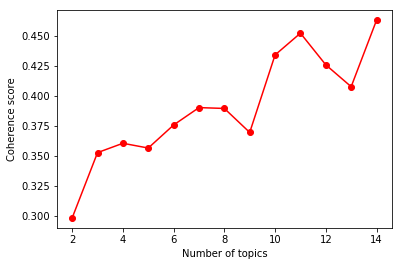

In [10]:
import matplotlib.pyplot as plt
plt.plot(list(range(2,15)),[i[1] for i in coh_sc],"ro-");plt.xlabel("Number of topics");plt.ylabel("Coherence score")

In [12]:
# From the above we will consider topics 3 as best model for topic modelling 
# Topic modelling visualization 
visulize_3 = pyLDAvis.gensim.prepare(coh_sc[1][0],TDM,ID_2_WORD)
visulize_3

E:\Bokey\Window_SW\Conda_INS\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0      55.265312        1       1 -0.180367  0.032863
2      23.304003        1       2  0.058556 -0.156990
1      21.430687        1       3  0.121811  0.124128, topic_info=     Category           Freq           Term          Total  loglift  logprob
term                                                                        
5     Default  156447.000000            and  156447.000000  30.0000  30.0000
94    Default   21531.000000           were   21531.000000  29.0000  29.0000
59    Default   12602.000000        patient   12602.000000  28.0000  28.0000
93    Default   24183.000000             wa   24183.000000  27.0000  27.0000
108   Default    9460.000000           cell    9460.000000  26.0000  26.0000
86    Default  287169.000000            the  287169.000000  25.0000  25.0000
97    Default   45343.000000           with   45343.000000  24.0000  24.0000
82    Default   15229.000000          study   15229.000000  23.0000  23.0000
299   Default   44291.000000           that   44291.000000  22.0000  22.0000
1299  Default    4335.000000           gene    4335.000000  21.0000  21.0000
522   Default    4101.000000        protein    4101.000000  20.0000  20.0000
120   Default    4009.000000     expression    4009.000000  19.0000  19.0000
1377  Default    4893.000000      treatment    4893.000000  18.0000  18.0000
283   Default    7845.000000          paper    7845.000000  17.0000  17.0000
488   Default    7713.000000         effect    7713.000000  16.0000  16.0000
184   Default    2858.000000       clinical    2858.000000  15.0000  15.0000
2270  Default    2631.000000            rat    2631.000000  14.0000  14.0000
329   Default    5440.000000          group    5440.000000  13.0000  13.0000
243   Default   12881.000000         system   12881.000000  12.0000  12.0000
865   Default    3016.000000           risk    3016.000000  11.0000  11.0000
2308  Default    2313.000000         neuron    2313.000000  10.0000  10.0000
8     Default    6385.000000       approach    6385.000000   9.0000   9.0000
286   Default    5725.000000        problem    5725.000000   8.0000   8.0000
1549  Default    3223.000000            had    3223.000000   7.0000   7.0000
3534  Default    2095.000000          mouse    2095.000000   6.0000   6.0000
697   Default    5160.000000       response    5160.000000   5.0000   5.0000
1081  Default    4657.000000          after    4657.000000   4.0000   4.0000
602   Default    3409.000000           year    3409.000000   3.0000   3.0000
659   Default    3571.000000          human    3571.000000   2.0000   2.0000
1506  Default    3452.000000          brain    3452.000000   1.0000   1.0000
...       ...            ...            ...            ...      ...      ...
3059   Topic3    1393.725098  concentration    1593.212280   1.4066  -6.4020
1629   Topic3    1100.331055        induced    1228.503540   1.4302  -6.6384
100    Topic3    1515.936523     activation    1839.900757   1.3467  -6.3180
86     Topic3   56891.464844            the  287169.187500  -0.0786  -2.6929
5      Topic3   33834.421875            and  156447.109375   0.0091  -3.2125
1506   Topic3    2215.987061          brain    3452.760742   1.0969  -5.9383
526    Topic3    2179.770020           role    3504.111816   1.0656  -5.9548
299    Topic3   12301.285156           that   44291.441406   0.2593  -4.2243
697    Topic3    2819.456543       response    5160.695801   0.9358  -5.6975
488    Topic3    3668.030762         effect    7713.693848   0.7970  -5.4344
659    Topic3    2171.946289          human    3571.661621   1.0429  -5.9584
166    Topic3    2416.350098       activity    4261.507812   0.9730  -5.8518
93     Topic3    6923.600586             wa   24183.078125   0.2896  -4.7991
94     Topic3    5774.711914           were   21531.330078   0.2243  -4.9805
154    Topic3    4195.629883          these   13323.701172   0.3848 

In [13]:
# Topic modelling with 2 topics representing in 2-D visualization 
visulize_2 = pyLDAvis.gensim.prepare(coh_sc[0][0],TDM,ID_2_WORD)
visulize_2

E:\Bokey\Window_SW\Conda_INS\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics        x    y
topic                                          
0      58.559807        1       1  0.13493  0.0
1      41.440193        1       2 -0.13493  0.0, topic_info=     Category           Freq         Term          Total  loglift  logprob
term                                                                      
94    Default   22501.000000         were   22501.000000  30.0000  30.0000
93    Default   25078.000000           wa   25078.000000  29.0000  29.0000
59    Default   13432.000000      patient   13432.000000  28.0000  28.0000
108   Default    9153.000000         cell    9153.000000  27.0000  27.0000
5     Default  157209.000000          and  157209.000000  26.0000  26.0000
97    Default   46126.000000         with   46126.000000  25.0000  25.0000
1377  Default    5131.000000    treatment    5131.000000  24.0000  24.0000
283   Default    7667.000000        paper    7667.000000  23.0000  23.0000
82    Default   15715.000000        study   15715.000000  22.0000  22.0000
1299  Default    4194.000000         gene    4194.000000  21.0000  21.0000
522   Default    3967.000000      protein    3967.000000  20.0000  20.0000
1506  Default    3462.000000        brain    3462.000000  19.0000  19.0000
488   Default    7787.000000       effect    7787.000000  18.0000  18.0000
286   Default    5595.000000      problem    5595.000000  17.0000  17.0000
243   Default   12566.000000       system   12566.000000  16.0000  16.0000
1081  Default    4794.000000        after    4794.000000  15.0000  15.0000
330   Default    6184.000000  information    6184.000000  14.0000  14.0000
184   Default    3046.000000     clinical    3046.000000  13.0000  13.0000
846   Default    4836.000000      network    4836.000000  12.0000  12.0000
120   Default    3883.000000   expression    3883.000000  11.0000  11.0000
8     Default    6227.000000     approach    6227.000000  10.0000  10.0000
1137  Default    2753.000000      disease    2753.000000   9.0000   9.0000
306   Default    4517.000000    algorithm    4517.000000   8.0000   8.0000
697   Default    5163.000000     response    5163.000000   7.0000   7.0000
1549  Default    3408.000000          had    3408.000000   6.0000   6.0000
2270  Default    2545.000000          rat    2545.000000   5.0000   5.0000
675   Default   12137.000000        model   12137.000000   4.0000   4.0000
1020  Default    3450.000000    increased    3450.000000   3.0000   3.0000
1284  Default    5074.000000         work    5074.000000   2.0000   2.0000
990   Default    3821.000000     proposed    3821.000000   1.0000   1.0000
...       ...            ...          ...            ...      ...      ...
120    Topic2    3588.315918   expression    3883.834717   0.8018  -6.1158
46     Topic2    1567.791626        month    1590.767456   0.8664  -6.9438
527    Topic2    2634.225830       showed    2804.049316   0.8184  -6.4249
1081   Topic2    4256.615234        after    4794.755859   0.7619  -5.9450
1020   Topic2    3122.784912    increased    3450.412354   0.7812  -6.2548
14     Topic2    2789.498047   conclusion    3052.619385   0.7908  -6.3676
488    Topic2    6151.806641       effect    7787.589844   0.6451  -5.5768
697    Topic2    4271.831543     response    5163.393555   0.6914  -5.9415
5      Topic2   74479.335938          and  157209.953125   0.1339  -3.0830
82     Topic2   10863.457031        study   15715.820312   0.5117  -5.0081
97     Topic2   26163.296875         with   46126.480469   0.3139  -4.1291
86     Topic2  102001.578125          the  285147.875000  -0.1471  -2.7685
439    Topic2    4141.854492       during    5418.218750   0.6123  -5.9724
329    Topic2    4185.495117        group    5687.145020   0.5743  -5.9619
1504   Topic2    3521.107422   associated    4513.065430   0.6327  -6.1347
166    Topic2    3316.304443     activity    4232.040527   0.6371  -6.1947
299    Topic2   16241.523438         that   43477.140625  -0.1037  -4.6059
265    Topic2  

In [15]:
# Topic modelling with 5 topics representing in 2-D visualization 
visulize_5 = pyLDAvis.gensim.prepare(coh_sc[3][0],TDM,ID_2_WORD)


E:\Bokey\Window_SW\Conda_INS\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [16]:
# Top 5 topics from the generated topic model of 5
coh_sc[3][0].top_topics(corpus = TDM,texts=bigram_words,topn=30,window_size=100)


[([(0.084603451, 'the'),
   (0.032506455, 'and'),
   (0.01984442, 'for'),
   (0.014590837, 'this'),
   (0.013197105, 'that'),
   (0.011430142, 'are'),
   (0.010050532, 'with'),
   (0.0084895967, 'system'),
   (0.0077095772, 'model'),
   (0.0074044392, 'can'),
   (0.0065811612, 'which'),
   (0.0062812204, 'data'),
   (0.0053841011, 'method'),
   (0.0047271308, 'paper'),
   (0.0046196179, 'from'),
   (0.0044331327, 'approach'),
   (0.0042306138, 'result'),
   (0.0041416204, 'based'),
   (0.0041038967, 'used'),
   (0.0040035988, 'using'),
   (0.0039730887, 'problem'),
   (0.0036431882, 'such'),
   (0.0035796666, 'our'),
   (0.0034845485, 'ha'),
   (0.003434198, 'network'),
   (0.0032731055, 'these'),
   (0.003207522, 'algorithm'),
   (0.0030686853, 'information'),
   (0.0030609271, 'have'),
   (0.0030228256, 'technique')],
  -1.4588058012870513),
 ([(0.052789155, 'and'),
   (0.052287627, 'the'),
   (0.025087209, 'with'),
   (0.020353589, 'wa'),
   (0.020166043, 'were'),
   (0.016741296, '

In [70]:
# Saving LDA MODEL - 5
coh_sc[3][0].save("LDA_MODEL_5.model")

In [17]:
# Saving LDA MODEL - 2 
coh_sc[0][0].save("LDA_MODEL_2.model")


In [18]:
# Saving LDA MODEL - 3 
coh_sc[1][0].save("LDA_MODEL_3.model")

In [19]:
# Saving LDAD MODEL - 10 
LDA_MOD.save("LDA_MODEL_10.model")

In [20]:
# Creating all possible bi grams and uni grams for document 1
bigram_mod[clean_text(data1.Text[0])]

['aim',
 'pudendal',
 'nerve',
 'stimulation',
 'pns',
 'which',
 'alternative',
 'sacral',
 'nerve',
 'stimulation',
 'requires',
 'neurophysiological',
 'confirmation',
 'correct',
 'siting',
 'the',
 'electrode',
 'describe',
 'modification',
 'the',
 'existing',
 'technique',
 'where',
 'placement',
 'assisted',
 'guidance',
 'the',
 'ischial',
 'spine',
 'finger',
 'introduced',
 'per',
 'anum',
 'method',
 'cadaveric',
 'dissection',
 'wa',
 'carried_out',
 'confirm',
 'the',
 'accuracy',
 'this',
 'new',
 'approach',
 'the',
 'surface',
 'marking',
 'the',
 'ischial',
 'spine',
 'marked',
 'stimulating',
 'needle',
 'electrode',
 'inserted',
 'through',
 'skin',
 'incision',
 'this',
 'point',
 'advanced',
 'towards',
 'the',
 'ischial',
 'spine',
 'using',
 'finger',
 'introduced',
 'per',
 'anum',
 'guide',
 'once',
 'effective',
 'stimulation',
 'the',
 'pudendal',
 'nerve',
 'confirmed',
 'observed',
 'and',
 'palpated',
 'contraction',
 'the',
 'anal',
 'musculature',
 'per

In [21]:
# Getting the weights of each topic per document 
topic_per_doc = LDA_MOD.inference(TDM)
topic_per_doc = [i for i in topic_per_doc[0]]
topic_per_doc_df = pd.DataFrame(topic_per_doc,columns=["t1","t2","t3","t4","t5","t6","t7","t8","t9","t10"])

In [22]:
topic_per_doc_df.head()

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
0,14.468199,0.228467,2.809497,14.020416,0.516835,38.200424,36.268394,25.762676,15.110294,11.740509
1,5.849874,31.834543,0.338649,1.793286,0.546024,68.517159,0.594587,2.767895,2.986046,1.897657
2,6.494426,7.265394,1.432064,1.238742,0.822367,55.183594,89.385559,3.746684,1.814832,2.742068
3,59.534424,0.225879,1.979434,0.191722,0.503747,22.512608,0.600263,10.642501,6.702202,0.232949
4,18.028971,0.226705,3.328485,0.192209,0.516785,19.510881,0.520795,1.192744,70.373604,0.234534


In [23]:
# Creating a function to normalize the weights of each topic per document 
def norm_func(i):
    temp = (i-min(i))/(max(i)-min(i))
    return temp

# Normalizing the entire topic_per_doc_df
topic_per_doc_df_norm = topic_per_doc_df.apply(norm_func)

In [24]:
topic_per_doc_df_norm.head()

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
0,0.058409,0.000026,0.020823,0.067021,0.000272,0.126398,0.170710,0.162753,0.062214,0.073303
1,0.021237,0.200329,0.000032,0.007763,0.000707,0.232300,0.000668,0.014810,0.009569,0.010609
2,0.024017,0.044622,0.009233,0.005075,0.004825,0.185723,0.423897,0.021108,0.004483,0.015987
3,0.252783,0.000010,0.013838,0.000001,0.000077,0.071598,0.000695,0.065474,0.025705,0.000006
4,0.073767,0.000015,0.025190,0.000003,0.000271,0.061113,0.000317,0.004676,0.302174,0.000016


In [25]:
# Preparing a function to retreive 5 similar documents based on row number
# i => data frame | j => Document numebr | k => number of docs to be retreived 
def retreive_closest_docs(i,j,k):
    temp_dist = cdist(i.iloc[j,:].values.reshape(-1,10),i)
    close_docs_indx = temp_dist[0].argsort()[:(k+1)]
    return close_docs_indx[1:]
    

In [26]:
# Retreiving the  top - 5 closest documents to 1st document 
retreive_closest_docs(topic_per_doc_df_norm,0,5)

array([31363, 21256,  6509, 14863, 24975], dtype=int64)

In [27]:
# top 5 documents closest to document 1 
data1.Text[retreive_closest_docs(topic_per_doc_df_norm,0,5)]

31363     "Accurate retinal blood vessel detection offe...
21256     "The objectives of this study were to determi...
6509      "Ossification of the cochlea following mening...
14863     "An optimal botulinum toxin dose may be relat...
24975     "Alterations in oculomotor performance are am...
Name: Text, dtype: object

In [28]:
# Top 10 documents closest to document 10
data1.Text[retreive_closest_docs(topic_per_doc_df_norm,10,10)]

18775     "Lecture archiving and the provision of onlin...
32507     "Customer Relationship Management (CRM) has b...
20570     "This Working Paper should not be reported as...
30948     "EXECUTIVE SUMMARY \" Learning in a Technolog...
28700     "China is experiencing a Cultural Renaissance...
14927     "The Cognitive Science Research group at ETS ...
15242     "The last decade and a half has seen an arden...
27890     " Higher education institutions are continuou...
7838      "Technologies of E-Government have increasing...
32287     "In this paper we describe the creative and i...
Name: Text, dtype: object

In [29]:
# Observing the topics for document 1 
LDA_MOD_doc_1 = LDA_MOD[ID_2_WORD.doc2bow(bigram_mod[clean_text(data1.Text[0])])]

In [30]:
pyLDAvis.enable_notebook()
topic_modelling_doc1 = pyLDAvis.gensim.prepare(LDA_MOD,TDM[:1],ID_2_WORD)
topic_modelling_doc1

E:\Bokey\Window_SW\Conda_INS\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
5      24.005678        1       1  0.242653 -0.087528
6      22.792316        1       2  0.036576 -0.177232
7      16.189728        1       3  0.110095  0.048653
8       9.497501        1       4  0.232005  0.072729
0       9.091745        1       5  0.229090  0.102522
3       8.810928        1       6 -0.274692  0.083998
9       7.378154        1       7 -0.188509 -0.251847
2       1.765579        1       8 -0.077908  0.242732
4       0.324796        1       9 -0.245913  0.140502
1       0.143576        1      10 -0.063398 -0.174530, topic_info=      Category      Freq           Term     Total  loglift  logprob
term                                                               
86     Default  9.000000            the  9.000000  30.0000  30.0000
5      Default  5.000000            and  5.000000  29.0000  29.0000
299    Default  1.000000           that  1.000000  28.0000  28.0000
59     Default  1.000000        patient  1.000000  27.0000  27.0000
93     Default  1.000000             wa  1.000000  26.0000  26.0000
94     Default  1.000000           were  1.000000  25.0000  25.0000
97     Default  2.000000           with  2.000000  24.0000  24.0000
31     Default  1.000000            for  1.000000  23.0000  23.0000
88     Default  0.000000           this  0.000000  22.0000  22.0000
103    Default  0.000000            are  0.000000  21.0000  21.0000
1604   Default  0.000000          image  0.000000  20.0000  20.0000
488    Default  0.000000         effect  0.000000  19.0000  19.0000
1506   Default  0.000000          brain  0.000000  18.0000  18.0000
82     Default  0.000000          study  0.000000  17.0000  17.0000
154    Default  0.000000          these  0.000000  16.0000  16.0000
96     Default  0.000000          which  0.000000  15.0000  15.0000
1137   Default  0.000000        disease  0.000000  14.0000  14.0000
597    Default  0.000000          their  0.000000  13.0000  13.0000
1377   Default  0.000000      treatment  0.000000  12.0000  12.0000
243    Default  0.000000         system  0.000000  11.0000  11.0000
3655   Default  0.000000         specie  0.000000  10.0000  10.0000
44     Default  0.000000         method  0.000000   9.0000   9.0000
91     Default  0.000000          using  0.000000   8.0000   8.0000
2240   Default  0.000000          water  0.000000   7.0000   7.0000
222    Default  0.000000         sample  0.000000   6.0000   6.0000
2270   Default  0.000000            rat  0.000000   5.0000   5.0000
190    Default  0.000000           data  0.000000   4.0000   4.0000
1081   Default  0.000000          after  0.000000   3.0000   3.0000
145    Default  0.000000         signal  0.000000   2.0000   2.0000
675    Default  0.000000          model  0.000000   1.0000   1.0000
...        ...       ...            ...       ...      ...      ...
1999   Topic10  0.000455  proliferation  0.000498   6.4564  -6.1799
3237   Topic10  0.000450          aging  0.000493   6.4555  -6.1905
1632   Topic10  0.000433  intracellular  0.000476   6.4521  -6.2293
1626   Topic10  0.000418           gaba  0.000460   6.4488  -6.2655
519    Topic10  0.000411        peptide  0.000454   6.4473  -6.2810
12170  Topic10  0.000402     macrophage  0.000444   6.4452  -6.3038
1972   Topic10  0.000399      apoptosis  0.000441   6.4444  -6.3121
7808   Topic10  0.000378     expressing  0.000421   6.4392  -6.3644
1558   Topic10  0.000375       promoter  0.000418   6.4384  -6.3728
7711   Topic10  0.000368       cytokine  0.000410   6.4363  -6.3924
2969   Topic10  0.001512         tissue  0.025551   3.7191  -4.9784
680    Topic10  0.001133        pathway  0.015358   3.9397  -5.2668
510    Topic10  0.000800       membrane  0.005620   4.5964  -5.6155
5      Topic10  0.004602            and  5.391780  -0.5201  -3.8656
299    Topic10  0.002878           that  1.178647   0.5309  -4.3352
659    Topic10  0.001238          human  0.06

In [31]:
# topic modelling visualization for top 5 closest documents to document 1 
# Retreiving the  top - 5 closest documents for document 1  
retreive_closest_docs(topic_per_doc_df_norm,0,5)
pyLDAvis.enable_notebook()
close_docs_2_doc1 = [TDM[i] for i in retreive_closest_docs(topic_per_doc_df_norm,0,5)]
topic_modelling_similar_2_doc1 = pyLDAvis.gensim.prepare(LDA_MOD,close_docs_2_doc1,ID_2_WORD)
topic_modelling_similar_2_doc1


E:\Bokey\Window_SW\Conda_INS\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
5      28.490448        1       1  0.242653 -0.087528
6      24.861946        1       2  0.036576 -0.177232
7      18.830276        1       3  0.110095  0.048653
0       9.922468        1       4  0.229090  0.102522
8       7.104099        1       5  0.232005  0.072729
9       6.011016        1       6 -0.188509 -0.251847
3       1.960097        1       7 -0.274692  0.083998
2       1.231690        1       8 -0.077908  0.242732
4       1.037010        1       9 -0.245913  0.140502
1       0.550949        1      10 -0.063398 -0.174530, topic_info=      Category       Freq           Term      Total  loglift  logprob
term                                                                 
86     Default  42.000000            the  42.000000  30.0000  30.0000
5      Default  25.000000            and  25.000000  29.0000  29.0000
299    Default   5.000000           that   5.000000  28.0000  28.0000
59     Default   4.000000        patient   4.000000  27.0000  27.0000
93     Default   6.000000             wa   6.000000  26.0000  26.0000
94     Default   6.000000           were   6.000000  25.0000  25.0000
88     Default   4.000000           this   4.000000  24.0000  24.0000
31     Default   8.000000            for   8.000000  23.0000  23.0000
97     Default  10.000000           with  10.000000  22.0000  22.0000
103    Default   3.000000            are   3.000000  21.0000  21.0000
1604   Default   1.000000          image   1.000000  20.0000  20.0000
488    Default   1.000000         effect   1.000000  19.0000  19.0000
597    Default   1.000000          their   1.000000  18.0000  18.0000
82     Default   3.000000          study   3.000000  17.0000  17.0000
1377   Default   1.000000      treatment   1.000000  16.0000  16.0000
96     Default   1.000000          which   1.000000  15.0000  15.0000
154    Default   1.000000          these   1.000000  14.0000  14.0000
243    Default   1.000000         system   1.000000  13.0000  13.0000
1506   Default   0.000000          brain   0.000000  12.0000  12.0000
44     Default   2.000000         method   2.000000  11.0000  11.0000
1081   Default   1.000000          after   1.000000  10.0000  10.0000
1137   Default   0.000000        disease   0.000000   9.0000   9.0000
675    Default   2.000000          model   2.000000   8.0000   8.0000
865    Default   1.000000           risk   1.000000   7.0000   7.0000
190    Default   1.000000           data   1.000000   6.0000   6.0000
145    Default   0.000000         signal   0.000000   5.0000   5.0000
562    Default   1.000000           have   1.000000   4.0000   4.0000
107    Default   1.000000            can   1.000000   3.0000   3.0000
697    Default   0.000000       response   0.000000   2.0000   2.0000
184    Default   1.000000       clinical   1.000000   1.0000   1.0000
...        ...        ...            ...        ...      ...      ...
3237   Topic10   0.007157          aging   0.007302   5.1812  -6.1905
1632   Topic10   0.006884  intracellular   0.007029   5.1805  -6.2293
1626   Topic10   0.006640           gaba   0.006784   5.1797  -6.2655
519    Topic10   0.006537        peptide   0.006682   5.1794  -6.2810
12170  Topic10   0.006390     macrophage   0.006534   5.1789  -6.3038
1972   Topic10   0.006337      apoptosis   0.006482   5.1787  -6.3121
7808   Topic10   0.006014     expressing   0.006159   5.1775  -6.3644
1558   Topic10   0.005964       promoter   0.006109   5.1773  -6.3728
7711   Topic10   0.005848       cytokine   0.005993   5.1768  -6.3924
510    Topic10   0.012718       membrane   0.028990   4.3773  -5.6155
680    Topic10   0.018024        pathway   0.066048   3.9026  -5.2668
2969   Topic10   0.024050         tissue   0.132657   3.4936  -4.9784
2192   Topic10   0.011128      expressed   0.033581   4.0968  -5.7490
5      Topic10   0.073179            and  25.322136  -0.6452  -3.8656
299    Topic10   0.

In [32]:
# Loading the topic modelling model which was prepared with 2 topics 
LDA_MOD_2 = gensim.models.ldamodel.LdaModel.load("C:\\Users\\Pavan Satya\\LDA_MODEL_2.model", mmap=None)

In [33]:
# getting topic weights per document for the above model 
topic_per_doc_2 = LDA_MOD_2.inference(TDM)
topic_per_doc_2 = [i for i in topic_per_doc_2[0]]
topic_per_doc_2_df = pd.DataFrame(topic_per_doc_2,columns=["t1","t2"])

In [34]:
topic_per_doc_2_df.head(5)

,t1,t2
0,46.050236,107.459206
1,5.853403,105.656044
2,6.236290,158.273178
3,97.324623,0.184842
4,108.324829,0.184618


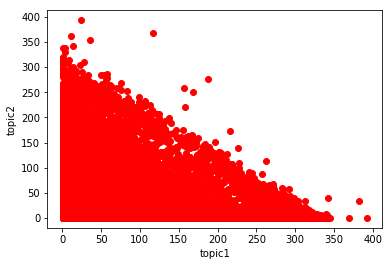

In [35]:
# Representing each document in 2-D using the 2 topic scores 
import matplotlib.pyplot as plt
plt.plot(topic_per_doc_2_df.t1,topic_per_doc_2_df.t2,"ro");plt.xlabel("topic1");plt.ylabel("topic2")